# Введение

Данные включают экономическую и демографическую информацию, а также информацию о болезнях о 179 странах за 2000-2015 год. На основе этого вычисляется ожидаемая продолжительность жизни.

Датасет имеет 21 переменную and 2864 строк.

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import itertools

In [4]:
df = pd.read_csv('Life-Expectancy-Data-Updated.csv')
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


# Info и describe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

In [6]:
df.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075
std,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000
50%,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000
75%,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000,83.800000


Economy_status_Developing = 1 - Economy_status_Developed, поэтому одну из этих колонок можно дропнуть.

In [7]:
df = df.drop(['Economy_status_Developing'], axis = 1)

# Сравнение с нормальным распределением

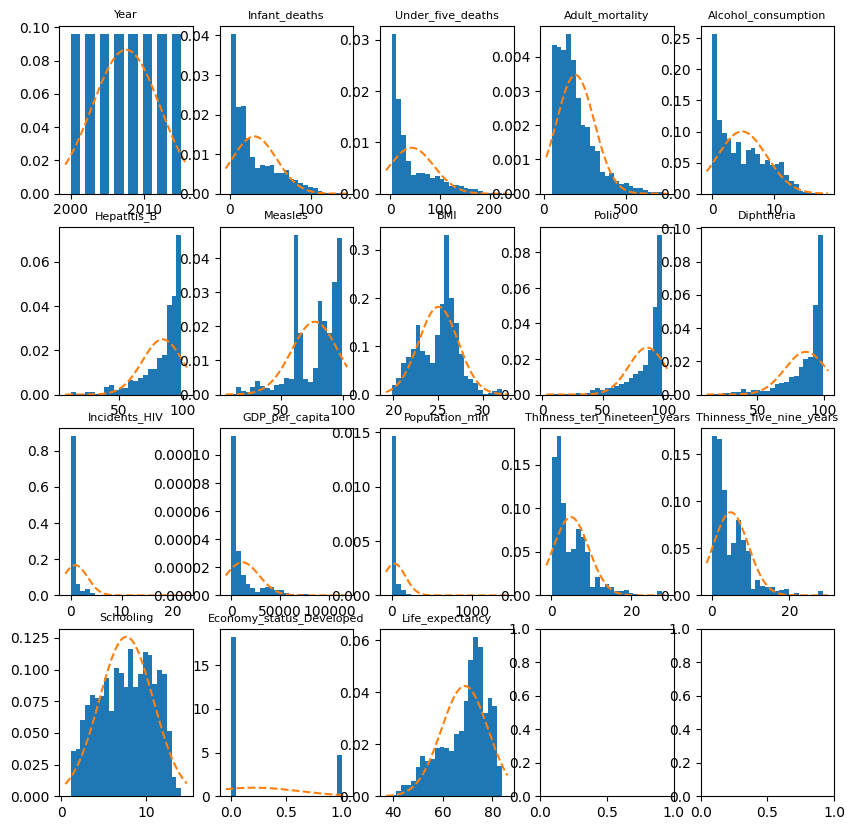

In [8]:
keys = list(df.select_dtypes(include='number').columns)

fig, axes = plt.subplots(4, 5, figsize=(10, 10))
# fig.set_size_inches(8 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    ax.hist(df[key], density=True, bins=23)

    loc = df[key].mean()
    scale = df[key].std()

    x_left, x_right = ax.get_xlim()
    x = np.linspace(x_left, x_right, 10000)
    y = stats.norm.pdf(x, loc=loc, scale=scale)

    ax.plot(x, y, linestyle='dashed')
    ax.set_title(key, fontsize=8)

Более-менее нормально распределено BMI, schooling и life expectancy, но эти распределения всё ещё не нормальные. Построим для них Q-Q кривые.

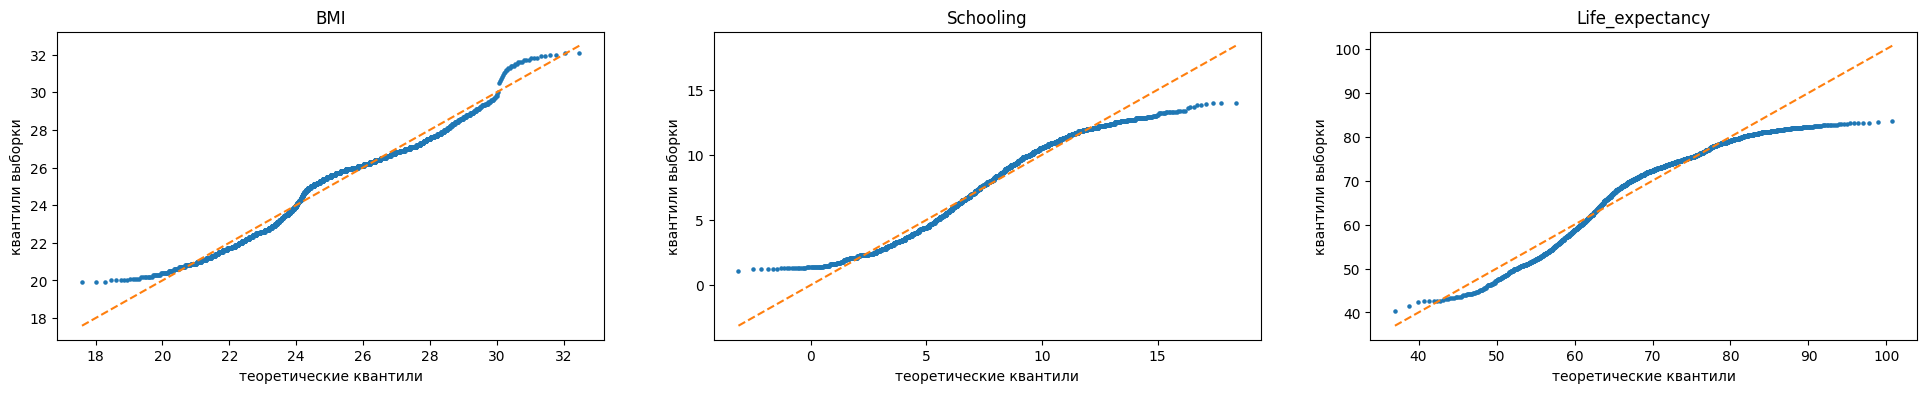

In [9]:
keys = ['BMI', 'Schooling', 'Life_expectancy']


fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(8 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    samples = df[key]

    loc = samples.mean()
    scale = samples.std()

    interval = np.linspace(0, 1, samples.shape[0])[1:-1]
    x = stats.norm.ppf(interval, loc=loc, scale=scale)
    y = np.quantile(samples, interval)

    ax.scatter(x, y, s=5)
    ax.plot(x, x, color='C1', linestyle='dashed')

    ax.set_title(key)
    ax.set_xlabel('теоретические квантили')
    ax.set_ylabel('квантили выборки')

Посчитаем вероятности попадания этих величин в интервалы сигм (теоритическое и фактическое)

In [17]:
for key in keys:
    print(key)

    samples = df[key]

    loc = samples.mean()
    scale = samples.std()

    for i in range(1, 4):
        true_value = stats.norm.cdf(i) - stats.norm.cdf(-i)
        sample_value = ((samples >= loc - i * scale) & (samples <= loc + i * scale)).sum() / samples.shape[0]

        print(f'{i} sigma(s)')
        print(f'\ttheoretical:\t{true_value}')
        print(f'\tsample:\t\t{sample_value}')

    print()

BMI
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.678072625698324
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9643854748603352
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9954608938547486

Schooling
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.6030027932960894
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9961592178770949
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		1.0

Life_expectancy
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.6595670391061452
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9574022346368715
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9993016759776536



Видно, что наиболее нормально распределённый параметр -- BMI (индекс массы тела).

# Как по годам менялась средняя продолжительность жизни по регионам

Построим графики зависимости продолжительности жизни по регионам

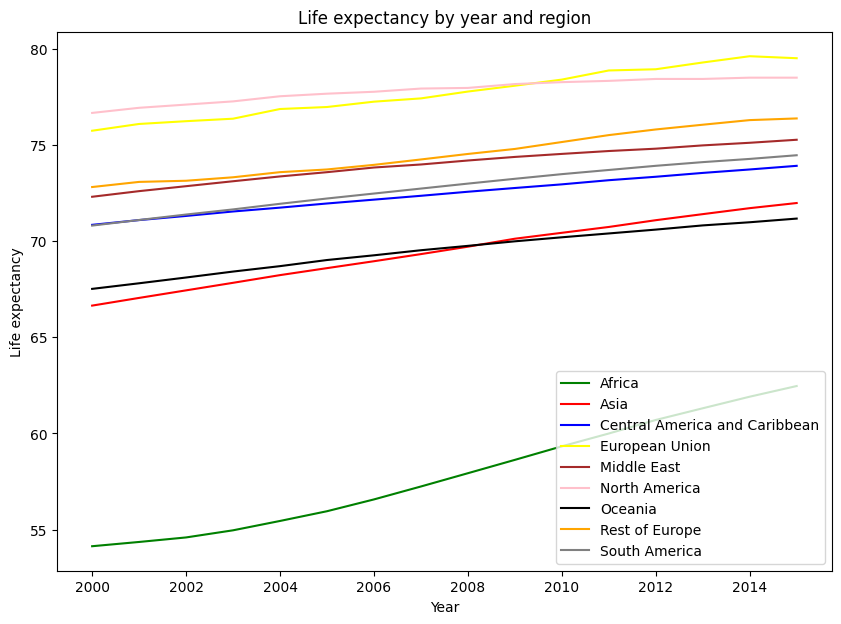

In [10]:
regions = np.sort(df['Region'].unique())

colors = itertools.cycle(['green', 'red', 'blue', 'yellow', 'brown', 'pink', 'black', 'orange', 'grey'])
plt.figure(figsize=(10, 7))
for region in regions:
  region_year = df.loc[df['Region'] == region, ['Year', 'Life_expectancy']].groupby('Year')['Life_expectancy'].mean()
  # plt.scatter(region_years[:][0], region_years[:][1], color = next(colors), s = 1)
  # print(region_years)
  plt.plot(region_year, color = next(colors))
plt.xlabel('Year')
plt.ylabel('Life expectancy')
plt.title('Life expectancy by year and region')
plt.legend(regions, loc ="lower right")


Видно, что во всех регионах продолжительность жизни растёт, но этот рост происходит быстрее в регионах, где средняя продолжительность жизни меньше остальных (Африка, Азия). Далее попытаемся узнать, почему это так.

# Матрица корреляций для всего датасета и всех числовых параметров

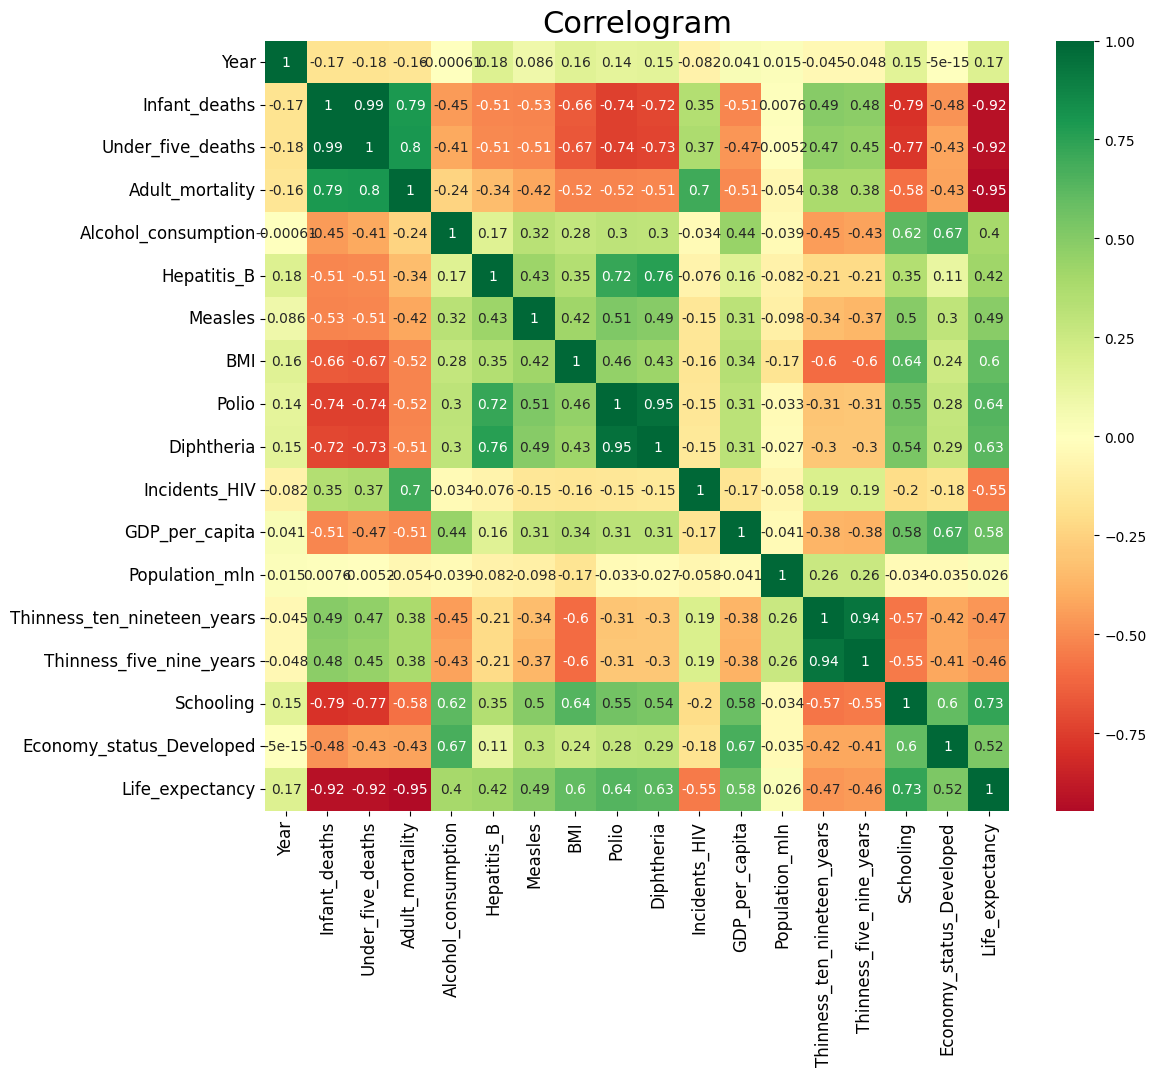

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), xticklabels=df.corr(numeric_only=True).columns, yticklabels=df.corr(numeric_only=True).columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Correlogram', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Видно, что **Infant_deaths** и **Under_five_deaths** практически полностью кореллируют, поэтому 1 из этих столбцов можно удалить.

In [12]:
df = df.drop(['Under_five_deaths'], axis = 1)

# GDP and Life Expectancy

Text(0, 0.5, 'Life expectancy')

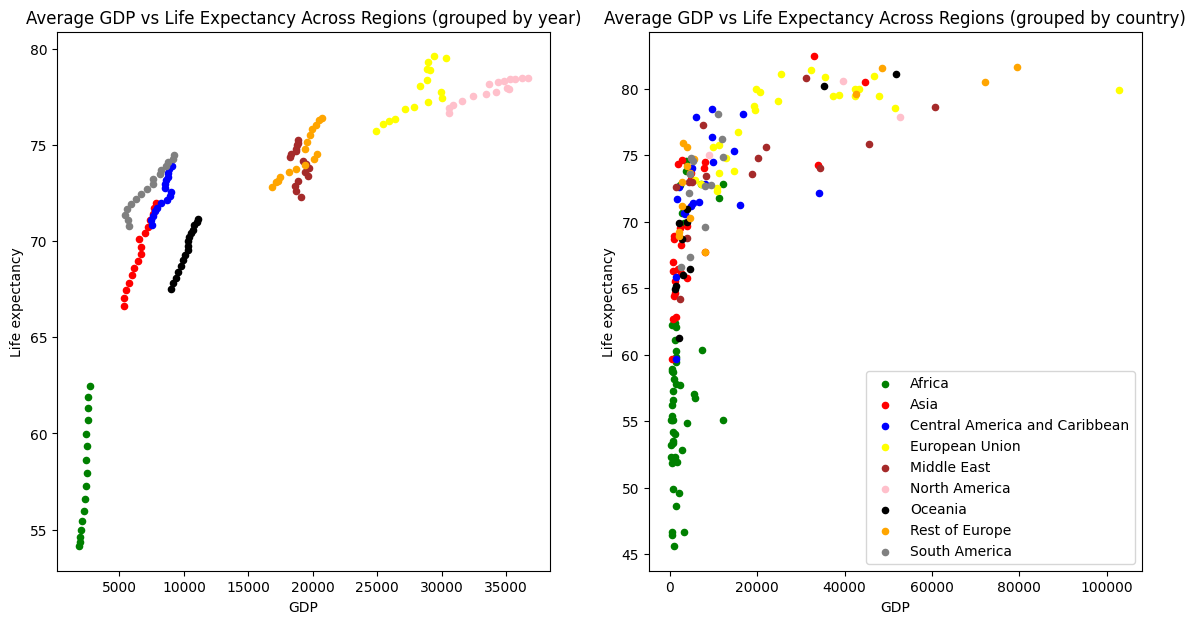

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14,7))
regions = np.sort(df['Region'].unique())

colors = itertools.cycle(['green', 'red', 'blue', 'yellow', 'brown', 'pink', 'black', 'orange', 'grey'])

for region in regions:
  df_agg = df.loc[df['Region']==region].groupby('Year').agg(
    avg_life=pd.NamedAgg(column='Life_expectancy', aggfunc='mean'),
    avg_gdp=pd.NamedAgg(column='GDP_per_capita', aggfunc='mean')
)
  df_agg.reset_index()
  # region_year = df.loc[df['Year'] == year, ['Region', 'Life_expectancy', 'GDP_per_capita']].groupby('Region')['Life_expectancy'].mean()
  axes[0].scatter(df_agg.avg_gdp, df_agg.avg_life, s=20, color=next(colors))
  plt.legend(regions, loc ="lower right")
axes[0].set_title("Average GDP vs Life Expectancy Across Regions (grouped by year)")
axes[0].set_xlabel("GDP")
axes[0].set_ylabel("Life expectancy")

for region in regions:
  df_agg = df.loc[df['Region']==region].groupby('Country').agg(
    avg_life=pd.NamedAgg(column='Life_expectancy', aggfunc='mean'),
    avg_gdp=pd.NamedAgg(column='GDP_per_capita', aggfunc='mean')
)
  df_agg.reset_index()
  # region_year = df.loc[df['Year'] == year, ['Region', 'Life_expectancy', 'GDP_per_capita']].groupby('Region')['Life_expectancy'].mean()
  axes[1].scatter(df_agg.avg_gdp, df_agg.avg_life, s=20, color=next(colors))
  plt.legend(regions, loc ="lower right")
axes[1].set_title("Average GDP vs Life Expectancy Across Regions (grouped by country)")
axes[1].set_xlabel("GDP")
axes[1].set_ylabel("Life expectancy")

# Развивающиеся и развитые страны

На левой картинке видим, что средняя прололжительность жизни в странах Африки и Азии за 15 лет выросла в среднем гораздо сильнее, чем в других регионах, хотя ВВП вырос не так уж сильно. Посмотрим, почему так


Сначала определим, насколько вообще регионы "Развитые"

In [14]:
countries = df[['Country', 'Region', 'Economy_status_Developed']].drop_duplicates().reset_index()
countries.groupby(['Region']).agg({'Economy_status_Developed': 'mean'})

,Economy_status_Developed
Region,
Africa,0.000000
Asia,0.037037
Central America and Caribbean,0.000000
European Union,1.000000
Middle East,0.071429
North America,0.666667
Oceania,0.181818
Rest of Europe,0.266667
South America,0.000000


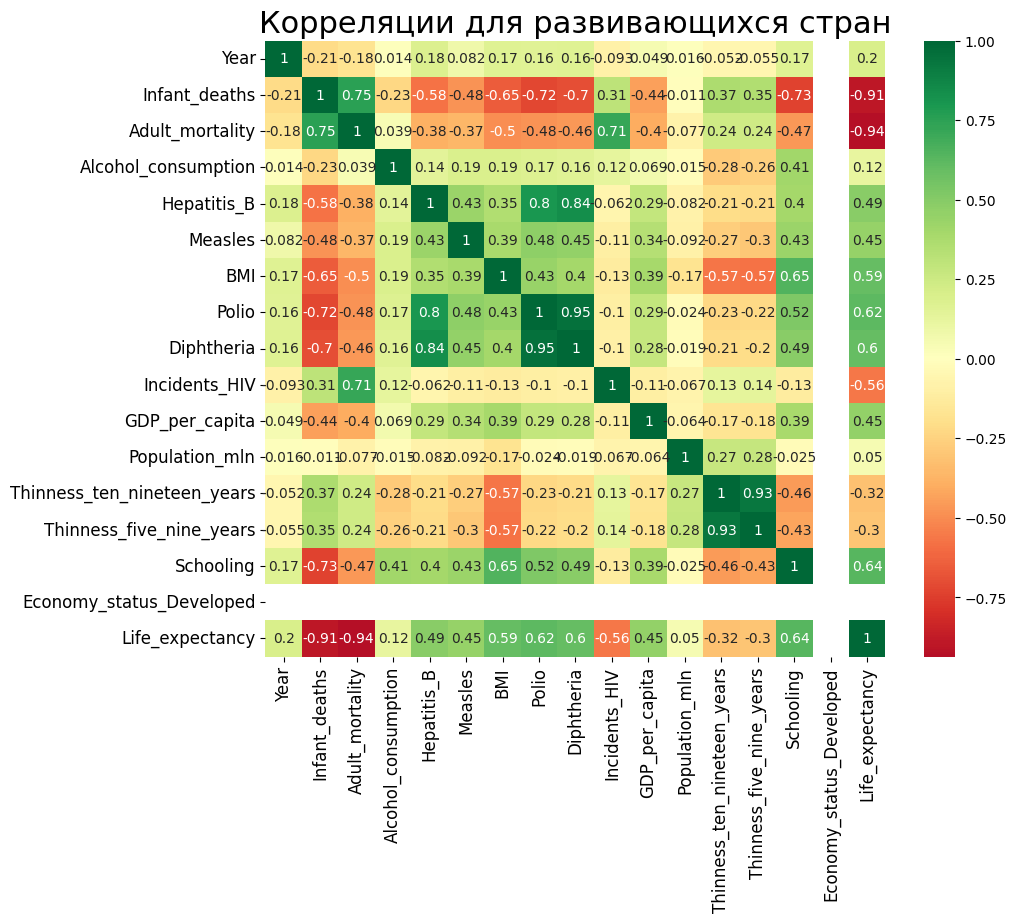

In [15]:

df1 = df.loc[df['Economy_status_Developed']==0]


plt.figure(figsize=(10,8))

sns.heatmap(df1.corr(numeric_only=True), xticklabels=df1.corr(numeric_only=True).columns, yticklabels=df1.corr(numeric_only=True).columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Корреляции для развивающихся стран', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

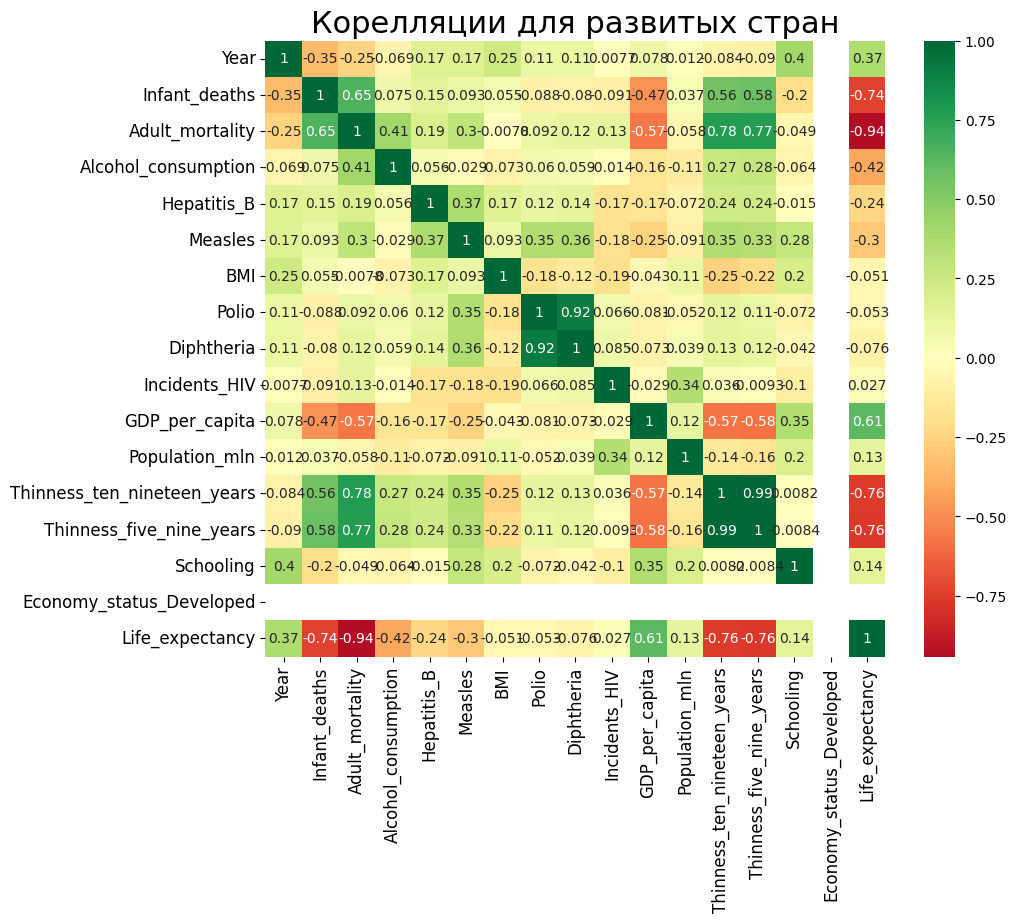

In [16]:
df1 = df.loc[df['Economy_status_Developed']==1]

plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(numeric_only=True), xticklabels=df1.corr(numeric_only=True).columns, yticklabels=df1.corr(numeric_only=True).columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Корелляции для развитых стран', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Видно, что корелляции для развитых и развивающихся сильно отличаются. Для развитых стран главным фактором увеличивающейся продолжительности жизни является растущий ВВП, а для развивающихся --- рост количества населения с иммунизацией от разных болезней и уменьшение доли ВИЧ-инфецированных людей. Отсюда и такой результат на графиках зависимости ожидаемой ПЖ от ВВП.  

# статистический тест

Нулевая гипотеза -- продолжительность жизни зависит от уровня образования

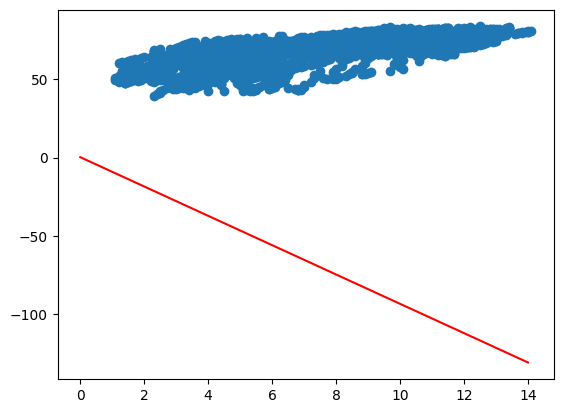

In [26]:
b1 = np.cov(df['Life_expectancy'], df['Schooling'], ddof=1)[0, 1] / np.var(df['Life_expectancy'], ddof=1)
b0 = df['Schooling'].mean() - b1 * df['Life_expectancy'].mean()

plt.scatter(df['Schooling'], df['Life_expectancy'])
x = np.linspace(0, 14, 1000)
y = b0*x + b1
plt.plot(x, y, color = 'r')
plt.show()

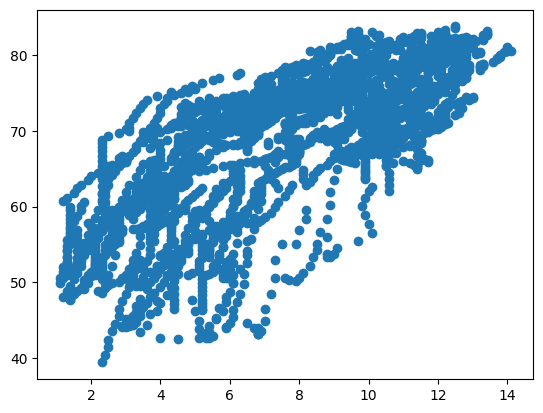

In [24]:
plt.scatter(df['Schooling'], df['Life_expectancy'])

Гипотеза неверна

# Выводы



1.   Продолжительность жизни растёт во всех регионах, но быстрее всего в Африке и Азии.
2.   В странах, где продолжительность жизни растет быстро, ВВП растет медленно, и наоборот.
3.   Можно выяснить, что первая группа стран из п.2 это примерно все развивающиеся, а вторая --- развитые.
4.   В развивающихся странах растет продложительность жизни в первую очередь потому, что там улучшается медицина, у людей появляется иммунитет к разным группам болезней.
5. А в развитых странах продолжительность жизни растет медленно и за счёт увеличения ВВП на душу населения.
6. Единственный параметр, распределение которого более-менее похоже на нормальное --- это индекс массы тела. Что в принципе логично

